# Forecasting for Banking Using Time Series Methods, Lab session 2
© Hugo Bourrousse  
October 2025

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests
import statsmodels.api as sm
from scipy.stats import jarque_bera

In [2]:
# Load dataframe
final_df = pd.read_pickle("final_df.pkl")
final_df['de_cap_g'] = final_df['de_cap'].pct_change(4,fill_method=None)
final_df.head(10)

,de_loan,de_dep,de_cap,de_gdp,de_ints,de_intl,de_ciss,de_hicp,de_gdp_sa,de_dep_sa,de_loan_sa,de_cap_sa,de_gdp_g,de_loan_g,de_dep_g,de_loan_d,de_dep_d,de_cap_g
1997Q4,3415366.0,2987309.0,197963.0,506217.29,NaN,5.490000,NaN,0.516667,500342.745117,2.973880e+06,3.419621e+06,197611.568877,NaN,NaN,NaN,NaN,NaN,NaN
1998Q1,3435838.0,3005318.0,202938.0,481205.72,NaN,5.000000,NaN,0.206667,489744.562729,3.009455e+06,3.436576e+06,203130.855336,NaN,NaN,NaN,20472.0,18009.0,NaN
1998Q2,3517512.0,3064839.0,207787.0,492703.92,NaN,4.886667,NaN,0.296667,497434.159663,3.061233e+06,3.513953e+06,207260.974178,NaN,NaN,NaN,81674.0,59521.0,NaN
1998Q3,3566887.0,3088691.0,207969.0,509263.72,NaN,4.386667,NaN,0.213333,501637.063256,3.102089e+06,3.565296e+06,208671.590352,NaN,NaN,NaN,49375.0,23852.0,NaN
1998Q4,3698872.0,3237024.0,212630.0,521496.95,NaN,4.013333,NaN,0.116667,515445.087886,3.222472e+06,3.703481e+06,212252.531485,3.018399,8.300897,8.359196,131985.0,148333.0,0.074090
1999Q1,3663429.0,3153883.0,218397.0,495250.00,NaN,3.863333,NaN,0.090000,504038.054019,3.158224e+06,3.664216e+06,218604.546279,2.918560,6.624032,4.943404,-35443.0,-83141.0,0.076176
1999Q2,3728913.0,3200743.0,227867.0,507670.00,NaN,4.073333,NaN,0.183333,512543.922598,3.196977e+06,3.725140e+06,227290.140398,3.037540,6.009958,4.434295,65484.0,46860.0,0.096637
1999Q3,3816760.0,3253088.0,232738.0,524670.00,NaN,4.866667,NaN,0.236667,516812.621128,3.267199e+06,3.815057e+06,233524.268499,3.025207,7.005352,5.322546,87847.0,52345.0,0.119099
1999Q4,3878472.0,3302450.0,236956.0,537290.00,NaN,5.160000,NaN,0.370000,531054.862871,3.287604e+06,3.883304e+06,236535.347085,3.028407,4.855534,2.021177,61712.0,49362.0,0.114405
2000Q1,3892954.0,3330627.0,241791.0,515500.00,2.73,5.460000,NaN,0.546667,524647.383840,3.335212e+06,3.893790e+06,242020.777984,4.088844,6.265305,5.604013,14482.0,28177.0,0.107117


In this session, we will try to forecast inflation in Germany (the variable de_hicp).  
1. using an ARMA univariate model
2. using a VAR model

## 1. ARMA Model

### 1.1. Estimation

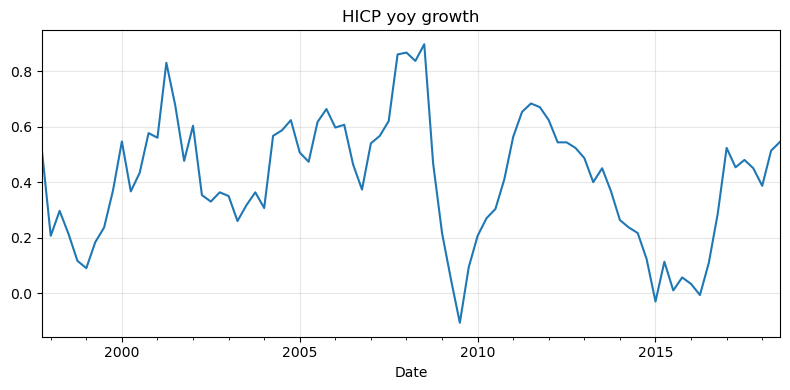

In [3]:
# plot the series
plt.figure(figsize=(8,4))
final_df['de_hicp'].plot(title="HICP yoy growth")
plt.xlabel("Date")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [4]:
# we select the series for estimation
series = final_df['de_hicp'][final_df.index<"2015Q1"].dropna()

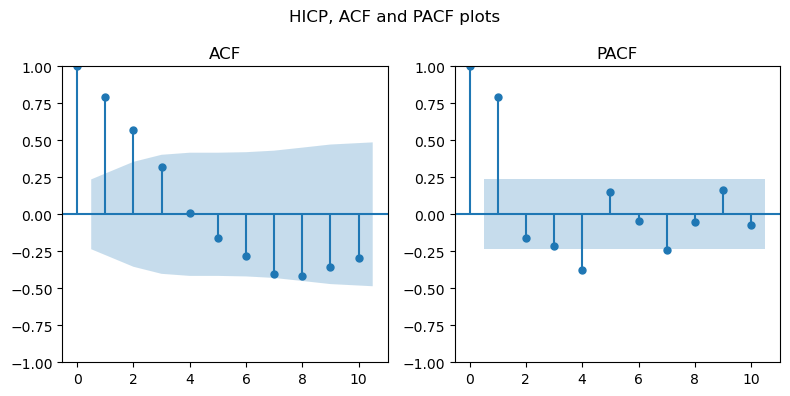

In [5]:
# ACF and PACF analysis

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle("HICP, ACF and PACF plots")
plot_acf(series, lags=10, ax=axes[0], title='ACF')
plot_pacf(series, lags=10, ax=axes[1], title='PACF')
plt.tight_layout()
plt.show()

In [6]:
# Let's try an AR(1)
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(series, order=(1,0,0))
result_ar1 = model.fit()
print(result_ar1.summary())

                               SARIMAX Results                                
Dep. Variable:                de_hicp   No. Observations:                   69
Model:                 ARIMA(1, 0, 0)   Log Likelihood                  45.549
Date:                Tue, 04 Nov 2025   AIC                            -85.098
Time:                        17:47:53   BIC                            -78.395
Sample:                    12-31-1997   HQIC                           -82.439
                         - 12-31-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4282      0.081      5.258      0.000       0.269       0.588
ar.L1          0.8097      0.066     12.241      0.000       0.680       0.939
sigma2         0.0154      0.003      6.131      0.0

In [7]:
# Let's check what the auto model selection based on information criterion would have suggested
import pmdarima as pm

model_sel = pm.auto_arima(
    series,
    start_p=0, max_p=5,        # AR order range
    start_q=0, max_q=5,        # MA order range
    d=0,                        # No differencing, we already work with the series in first differences
    seasonal=False,             # no seasonal adjustment needed
    stepwise=True,              # Faster search
    information_criterion='aic' # we could use something else
)
print("Selected ARMA order:", model_sel.order)

C:\Users\hbourrou\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\hbourrou\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\hbourrou\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\hbourrou\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\hbourrou\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed 

Selected ARMA order: (4, 0, 2)


In [8]:
model = ARIMA(series, order=(4,0,2))
result_arma42 = model.fit()
print(result_arma42.summary())

C:\Users\hbourrou\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                de_hicp   No. Observations:                   69
Model:                 ARIMA(4, 0, 2)   Log Likelihood                  57.015
Date:                Tue, 04 Nov 2025   AIC                            -98.030
Time:                        17:48:02   BIC                            -80.157
Sample:                    12-31-1997   HQIC                           -90.939
                         - 12-31-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4552      0.031     14.484      0.000       0.394       0.517
ar.L1          0.6722      0.198      3.397      0.001       0.284       1.060
ar.L2          0.5738      0.193      2.967      0.0

C:\Users\hbourrou\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### 1.2. Forecast

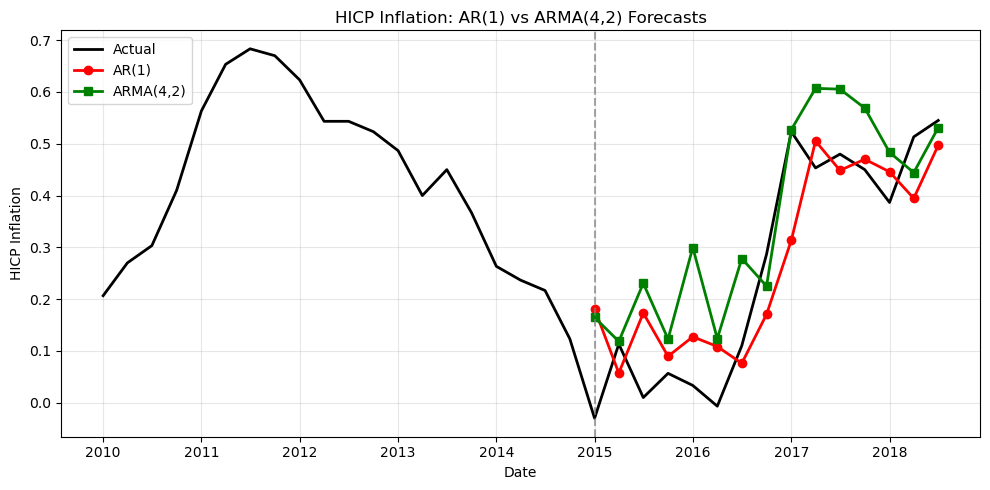

In [9]:
# Test period
test_start = "2015Q1"
test_end = "2018Q4"
test_series = final_df['de_hicp'].loc[test_start:test_end].dropna()

# 1-step ahead forecasts using apply() method
# This appends test data to the model without refitting

# Get the complete series including test period
full_series = final_df['de_hicp'].dropna()

# For AR(1)
forecast_ar1 = result_ar1.apply(
    full_series,
    refit=False
).fittedvalues.loc[test_series.index]

# For ARMA(4,2)
forecast_arma42 = result_arma42.apply(
    full_series,
    refit=False
).fittedvalues.loc[test_series.index]



# Plot
plot_data = final_df['de_hicp'].loc["2010Q1":test_end].dropna()
plot_data_ts = plot_data.copy()
if hasattr(plot_data_ts.index, 'to_timestamp'):
    plot_data_ts.index = plot_data_ts.index.to_timestamp()

test_ts = test_series.copy()
if hasattr(test_ts.index, 'to_timestamp'):
    test_ts.index = test_ts.index.to_timestamp()

forecast_ar1_ts = forecast_ar1.copy()
if hasattr(forecast_ar1_ts.index, 'to_timestamp'):
    forecast_ar1_ts.index = forecast_ar1_ts.index.to_timestamp()

forecast_arma42_ts = forecast_arma42.copy()
if hasattr(forecast_arma42_ts.index, 'to_timestamp'):
    forecast_arma42_ts.index = forecast_arma42_ts.index.to_timestamp()

plt.figure(figsize=(10, 5))
plt.plot(plot_data_ts.index, plot_data_ts, label='Actual', color='black', linewidth=2)
plt.plot(forecast_ar1_ts.index, forecast_ar1_ts, label='AR(1)', 
         color='red', marker='o', linewidth=2)
plt.plot(forecast_arma42_ts.index, forecast_arma42_ts, label='ARMA(4,2)', 
         color='green', marker='s', linewidth=2)
plt.axvline(pd.Timestamp('2015-01-01'), color='gray', linestyle='--', alpha=0.7)
plt.title('HICP Inflation: AR(1) vs ARMA(4,2) Forecasts')
plt.xlabel('Date')
plt.ylabel('HICP Inflation')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [10]:
# Calculate metrics
mse_ar1 = ((test_series - forecast_ar1)**2).mean()
mae_ar1 = np.abs(test_series - forecast_ar1).mean()
mse_arma42 = ((test_series - forecast_arma42)**2).mean()
mae_arma42 = np.abs(test_series - forecast_arma42).mean()

# Print comparison table
print("Forecast Accuracy Comparison (2015Q1-2018Q4)")
print("=" * 50)
comparison = pd.DataFrame({
    'Model': ['AR(1)', 'ARMA(4,2)'],
    'MSE': [mse_ar1, mse_arma42],
    'MAE': [mae_ar1, mae_arma42]
})
print(comparison.to_string(index=False))

Forecast Accuracy Comparison (2015Q1-2018Q4)
    Model      MSE      MAE
    AR(1) 0.012017 0.090792
ARMA(4,2) 0.018587 0.112969


## 2. VAR model

### 2.1. Estimation

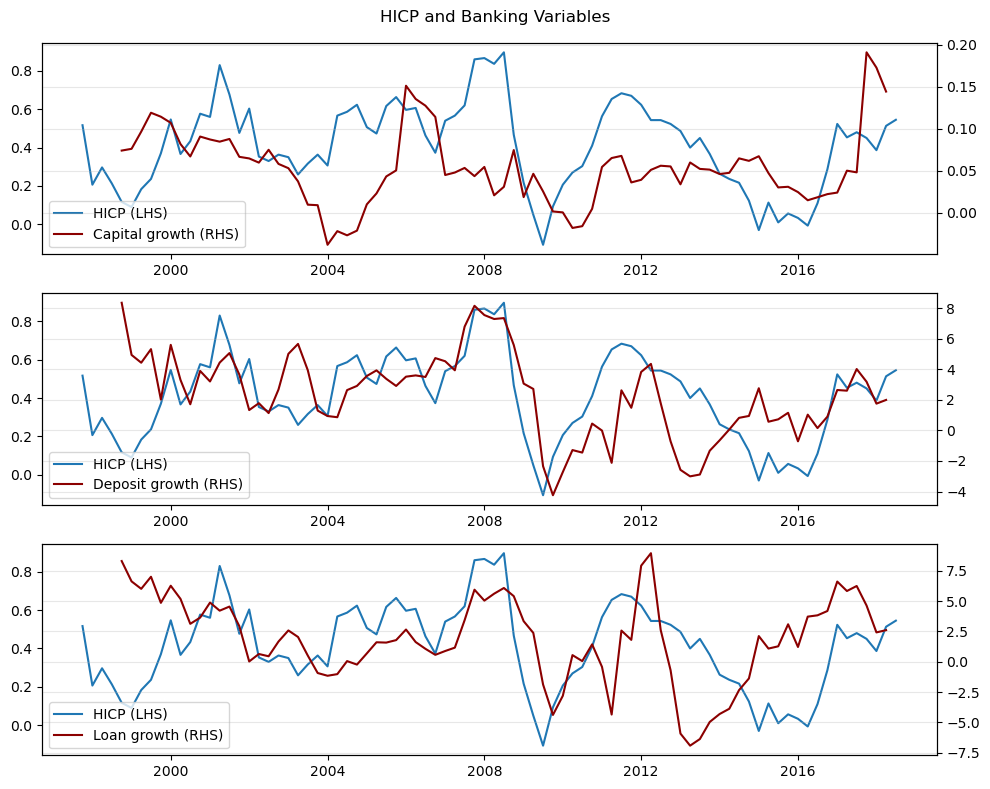

In [11]:
fig, ax = plt.subplots(3,1,figsize=(10,8))
axes = ax.flatten()
fig.suptitle('HICP and Banking Variables')

ax=axes[0]
ax.plot(final_df.index.to_timestamp(),final_df['de_hicp'],label='HICP (LHS)')
ax2=ax.twinx()
ax2.plot(final_df.index.to_timestamp(),final_df['de_cap_g'],label='Capital growth (RHS)',color='darkred')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='lower left')
plt.grid(alpha=0.3)

ax=axes[1]
ax.plot(final_df.index.to_timestamp(),final_df['de_hicp'],label='HICP (LHS)')
ax2=ax.twinx()
ax2.plot(final_df.index.to_timestamp(),final_df['de_dep_g'],label='Deposit growth (RHS)',color='darkred')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='lower left')
plt.grid(alpha=0.3)

ax=axes[2]
ax.plot(final_df.index.to_timestamp(),final_df['de_hicp'],label='HICP (LHS)')
ax2=ax.twinx()
ax2.plot(final_df.index.to_timestamp(),final_df['de_loan_g'],label='Loan growth (RHS)',color='darkred')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='lower left')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
# Let's check correlations
final_df[['de_hicp', 'de_cap_g', 'de_dep_g', 'de_loan_g']].corr()

,de_hicp,de_cap_g,de_dep_g,de_loan_g
de_hicp,1.000000,0.133333,0.419600,0.190898
de_cap_g,0.133333,1.000000,0.286992,0.277777
de_dep_g,0.419600,0.286992,1.000000,0.770326
de_loan_g,0.190898,0.277777,0.770326,1.000000


In [13]:
# Let's check Granger-causality
print("H0: capital does NOT Granger-cause inflation")
data_gc1 = final_df[['de_hicp','de_cap_g']].dropna()
gc_test1 = grangercausalitytests(data_gc1,1)

print("\nH0: deposits does NOT Granger-cause inflation")
data_gc1 = final_df[['de_hicp','de_dep_g']].dropna()
gc_test1 = grangercausalitytests(data_gc1,1)

print("\nH0: loans does NOT Granger-cause inflation")
data_gc1 = final_df[['de_hicp','de_loan_g']].dropna()
gc_test1 = grangercausalitytests(data_gc1,1)

H0: capital does NOT Granger-cause inflation

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3874  , p=0.5356  , df_denom=75, df_num=1
ssr based chi2 test:   chi2=0.4029  , p=0.5256  , df=1
likelihood ratio test: chi2=0.4018  , p=0.5261  , df=1
parameter F test:         F=0.3874  , p=0.5356  , df_denom=75, df_num=1

H0: deposits does NOT Granger-cause inflation

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2333  , p=0.6305  , df_denom=75, df_num=1
ssr based chi2 test:   chi2=0.2427  , p=0.6223  , df=1
likelihood ratio test: chi2=0.2423  , p=0.6226  , df=1
parameter F test:         F=0.2333  , p=0.6305  , df_denom=75, df_num=1

H0: loans does NOT Granger-cause inflation

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0837  , p=0.7731  , df_denom=75, df_num=1
ssr based chi2 test:   chi2=0.0871  , p=0.7679  , df=1
likelihood ratio test: chi2=0.0870  , p=0.7680  , df=1
parameter F test:         F=0.0837  

$\Rightarrow$ clearly no evidence

just for the sake of illustration, I'll include capital but based on this we could simply omitt the banking variables as it won't help us in the forecasting task (you can try it)

In [14]:
# Define train and test sample dates
train_end = "2014Q4"
test_start = "2015Q1"
test_end = str(final_df.index[-1])
df_var4 = final_df[['de_hicp','de_gdp_g','de_cap_g','de_intl']].loc[:train_end].dropna()


In [15]:
# Lag selection for the VAR
model_var4 = VAR(df_var4)
lagsel_var4 = model_var4.select_order(maxlags=8)
print(lagsel_var4.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -7.687      -7.543   0.0004589      -7.631
1      -13.47     -12.76*   1.412e-06      -13.19
2      -13.50      -12.21   1.382e-06      -13.00
3      -14.18      -12.31   7.191e-07     -13.45*
4      -14.22      -11.78   7.196e-07      -13.27
5      -14.23      -11.21   7.677e-07      -13.06
6      -14.09      -10.51   9.772e-07      -12.70
7      -14.01      -9.852   1.251e-06      -12.39
8     -14.88*      -10.15  6.667e-07*      -13.04
-------------------------------------------------


$\Rightarrow$ likely the VAR(1) will result in a bit of autocorrelation, but I opt for simplicity and parsimony and go ahead with this one

In [16]:
# Let's fit the VAR(1)
var4_1L = model_var4.fit(1)
print(var4_1L.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 04, Nov, 2025
Time:                     17:49:01
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -12.8941
Nobs:                     64.0000    HQIC:                  -13.3029
Log likelihood:           90.9505    FPE:                1.28156e-06
AIC:                     -13.5687    Det(Omega_mle):     9.48552e-07
--------------------------------------------------------------------
Results for equation de_hicp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.020061         0.049193            0.408           0.683
L1.de_hicp          0.699937         0.069647           10.050           0.000
L1.de_gdp_g         0.027263         0.006239            4.370    

In [17]:
# Look at the roots

roots = var4_1L.roots         
moduli = np.abs(roots)

print("Roots:\n", roots)
print("\nModuli:\n", moduli)

# stability test
stable = np.all(moduli > 1.0)
if stable:
    print("\nAll roots are outside the unit circle -> VAR is stable (stationary).")
else:
    print("\nSome roots are inside or on the unit circle -> VAR is NOT stable.")
    # show offenders
    print("\nRoots with modulus <= 1:\n", roots[moduli <= 1.0])

Roots:
 [1.16315876+0.3909384j 1.16315876-0.3909384j 1.19293368-0.j
 1.01686864-0.j       ]

Moduli:
 [1.22709866 1.22709866 1.19293368 1.01686864]

All roots are outside the unit circle -> VAR is stable (stationary).


In [18]:
# Residual diagnostics
print(f"\nResidual Diagnostics for estimated 4-equation VAR(1):")
# Test for no correlation (Ljung-Box type)
durbin_watson = np.mean([(var4_1L.resid.diff().iloc[:, i]**2).sum() / 
                         (var4_1L.resid.iloc[:, i]**2).sum() 
                         for i in range(var4_1L.resid.shape[1])])
print(f"   Durbin-Watson statistic (close to 2 = good): {durbin_watson:.3f}")

print('\n')
# Test normality (Jarque-Bera)
for i, col in enumerate(var4_1L.resid.columns):
    jb_result = jarque_bera(var4_1L.resid.iloc[:, i])
    print(f"   {col}: JB test statistic = {jb_result.statistic:.4f}, p-value = {jb_result.pvalue:.4f}")


print('\n')
white=var4_1L.test_whiteness(nlags=8)
print(white.summary())


Residual Diagnostics for estimated 4-equation VAR(1):
   Durbin-Watson statistic (close to 2 = good): 1.777


   de_hicp: JB test statistic = 0.9923, p-value = 0.6089
   de_gdp_g: JB test statistic = 3.6545, p-value = 0.1609
   de_cap_g: JB test statistic = 54.0688, p-value = 0.0000
   de_intl: JB test statistic = 0.0530, p-value = 0.9739


Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 8 is zero. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value  df
-----------------------------------------
         175.5          137.7   0.000 112
-----------------------------------------


Portmanteau test strongly rejects the null of no autocorrelation.  
Technically, we should add more lags, but I'll keep it simple and stick with the VAR(1)

### 2.2. Forecast

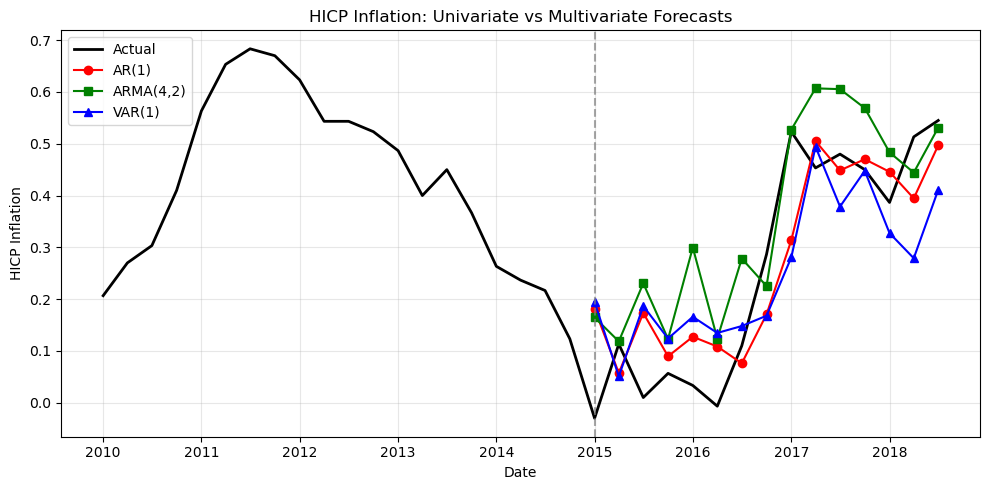

In [19]:
# Get full data including test period
df_var4_full = final_df[['de_hicp','de_gdp_g','de_cap_g','de_intl']].dropna()

# Test period
test_series = final_df['de_hicp'].loc[test_start:test_end].dropna()

# Manual 1-step ahead forecasts using VAR parameters
params = var4_1L.params  # Matrix of parameters
coef_matrix = var4_1L.coefs[0]  # Coefficient matrix for lag 1
intercept = var4_1L.intercept  # Intercept vector

# Index of de_hicp in the VAR (first variable)
hicp_idx = 0

forecast_var = []

for date in test_series.index:
    # Get lagged values (t-1) for all 4 variables
    prev_period = date - 1
    lagged_values = df_var4_full.loc[prev_period].values
    
    # Compute forecast: intercept + coef_matrix @ lagged_values
    forecast_all = intercept + coef_matrix @ lagged_values
    
    # Extract forecast for de_hicp
    forecast_var.append(forecast_all[hicp_idx])

forecast_var = pd.Series(forecast_var, index=test_series.index)

# Calculate metrics for VAR
mse_var = ((test_series - forecast_var)**2).mean()
mae_var = np.abs(test_series - forecast_var).mean()



# Plot
plot_data = final_df['de_hicp'].loc["2010Q1":test_end].dropna()

plt.figure(figsize=(10,5))
plt.plot(plot_data.index.to_timestamp(), plot_data, label='Actual', color='black', linewidth=2)
plt.plot(forecast_ar1.index.to_timestamp(), forecast_ar1, label='AR(1)',color='red', marker='o', linewidth=1.5)
plt.plot(forecast_arma42.index.to_timestamp(), forecast_arma42, label='ARMA(4,2)',color='green', marker='s', linewidth=1.5)
plt.plot(forecast_var.index.to_timestamp(), forecast_var, label='VAR(1)',color='blue', marker='^', linewidth=1.5)
plt.axvline(pd.Timestamp('2015-01-01'), color='gray', linestyle='--', alpha=0.7)
plt.title('HICP Inflation: Univariate vs Multivariate Forecasts')
plt.xlabel('Date')
plt.ylabel('HICP Inflation')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [20]:
# Model's performance comparisons
print("\n" + "="*70)
print("IN-SAMPLE FIT COMPARISON (Training Period: 1998Q1-2014Q4)")
print("="*70)

# Calculate R² for univariate models
# R² = 1 - SS_res / SS_tot
def calculate_r2(model_result):
    resid = model_result.resid
    endog = model_result.model.endog
    ss_res = (resid**2).sum()
    ss_tot = ((endog - endog.mean())**2).sum()
    return 1 - ss_res / ss_tot

r2_ar1 = calculate_r2(result_ar1)
r2_arma42 = calculate_r2(result_arma42)

# For VAR, calculate R² manually for de_hicp equation
var_resid_hicp = var4_1L.resid['de_hicp']
var_endog_hicp = df_var4['de_hicp']
ss_res_var = (var_resid_hicp**2).sum()
ss_tot_var = ((var_endog_hicp - var_endog_hicp.mean())**2).sum()
r2_var = 1 - ss_res_var / ss_tot_var

# Extract fit statistics
fit_comparison = pd.DataFrame({
    'Model': ['AR(1)', 'ARMA(4,2)', 'VAR(1)'],
    'Log-Likelihood': [result_ar1.llf, result_arma42.llf, var4_1L.llf],
    'AIC': [result_ar1.aic, result_arma42.aic, var4_1L.aic],
    'BIC': [result_ar1.bic, result_arma42.bic, var4_1L.bic],
    'R²': [r2_ar1, r2_arma42, r2_var]
})

print(fit_comparison.round(4).to_string(index=False))
print("\nNote: Log-likelihood/AIC/BIC not directly comparable (VAR models 4 variables)")
print("      R² for de_hicp equation is directly comparable across all models")

# Compare with ARIMA models
print("\n" + "="*70)
print("OUT-OF-SAMPLE FORECAST ACCURACY (Test Period: 2015Q1-2018Q4)")
print("="*70)
print("Forecast Accuracy Comparison (2015Q1-2018Q4)")
print("=" * 55)
comparison = pd.DataFrame({
    'Model': ['AR(1)', 'ARMA(4,2)', 'VAR(1)'],
    'MSE': [mse_ar1, mse_arma42, mse_var],
    'MAE': [mae_ar1, mae_arma42, mae_var]
})
print(comparison.to_string(index=False))



IN-SAMPLE FIT COMPARISON (Training Period: 1998Q1-2014Q4)
    Model  Log-Likelihood      AIC      BIC     R²
    AR(1)         45.5488 -85.0976 -78.3953 0.6501
ARMA(4,2)         57.0150 -98.0299 -80.1571 0.7428
   VAR(1)         90.9505 -13.5687 -12.8941 0.7648

Note: Log-likelihood/AIC/BIC not directly comparable (VAR models 4 variables)
      R² for de_hicp equation is directly comparable across all models

OUT-OF-SAMPLE FORECAST ACCURACY (Test Period: 2015Q1-2018Q4)
Forecast Accuracy Comparison (2015Q1-2018Q4)
    Model      MSE      MAE
    AR(1) 0.012017 0.090792
ARMA(4,2) 0.018587 0.112969
   VAR(1) 0.019364 0.118437


Comments:
- best in-sample fit for the VAR model
- forecasting performance out-of-sample is best for the simpler AR(1) model
  
$\Rightarrow$ **careful** here: there is no general conclusion that you can make out of this. This completely depends on the specificity of the series, training and testing sample, as well as on the type of forecast 

## 3. VECM model

### 3.1. Estimation

Clearly, it makes no sense to include in the VECM the variables in growth rate that we put in the VAR

Similarly, it makes no sense to model VECM/ECM for inflation and interest rates because these are already I(0) variables. Everything that follows is for the sake of illustration, so you can see how this is done in Python.

I will look at the bivariate system (inflation,interest rate), thinking of the Fisher relation linking nominal rates, real rates, and inflation.

In [21]:
from statsmodels.tsa.vector_ar.vecm import VECM, select_coint_rank, coint_johansen

# Prepare data
train_end = "2014Q4"
test_start = "2015Q1"
test_end = "2018Q4"

vecm_vars = ['de_hicp', 'de_intl']
data_train = final_df[vecm_vars].loc[:train_end].dropna()
data_full = final_df[vecm_vars].dropna()


# Johansen Cointegration Rank Test

print("\n" + "="*70)
print("JOHANSEN COINTEGRATION RANK TEST")
print("="*70)

jres = coint_johansen(data_train, det_order=1, k_ar_diff=1)

# Trace statistic and critical values
print('\n Trace Statistics and Critical Values (90%, 95%, 99%):')
for i in range(len(data_train.columns)):
    print(f"r <= {i}: Trace Stat = {jres.lr1[i]:.4f}, Critical Values = {jres.cvt[i]}")



JOHANSEN COINTEGRATION RANK TEST

 Trace Statistics and Critical Values (90%, 95%, 99%):
r <= 0: Trace Stat = 18.2742, Critical Values = [16.1619 18.3985 23.1485]
r <= 1: Trace Stat = 7.0801, Critical Values = [2.7055 3.8415 6.6349]


$\Rightarrow$ no evidence of cointegrating relationship  

only for the sake of illustration and to show how it's done in python, let's proceed with the estimation of a VECM model with one cointegrating relationship

In [22]:
# Estimate VECM with rank=1 and 1 lag of differences
vecm_model = VECM(data_train, k_ar_diff=1, coint_rank=1, deterministic='co')
vecm_result = vecm_model.fit()

print(vecm_result.summary())


Det. terms outside the coint. relation & lagged endog. parameters for equation de_hicp
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0559      0.024      2.343      0.019       0.009       0.103
L1.de_hicp     0.2194      0.127      1.729      0.084      -0.029       0.468
L1.de_intl    -0.0271      0.053     -0.513      0.608      -0.131       0.077
Det. terms outside the coint. relation & lagged endog. parameters for equation de_intl
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0071      0.057      0.124      0.901      -0.105       0.120
L1.de_hicp    -0.0973      0.306     -0.318      0.750      -0.697       0.502
L1.de_intl     0.3003      0.127      2.355      0.019       0.050       0.550
              Loading coefficients (

The cointegrating relations is not significant (beta.2 at the bottom), so no long run relationship 

Finally, we estimate a simple ECM between the two variables, to show how it's done

In [23]:
ecm_var = final_df[['de_hicp', 'de_intl']].dropna()

# Split train and test
data_train = ecm_var.loc[:train_end].copy()
data_test = ecm_var.loc[test_start:].copy()

# Estimate long-run relationship (Engle-Granger step 1)
# de_hicp_t = a + b * de_intl_t + u_t
longrun_model = sm.OLS(data_train['de_hicp'], sm.add_constant(data_train['de_intl'])).fit()
data_train['resid'] = data_train['de_hicp'] - longrun_model.predict(sm.add_constant(data_train['de_intl']))

print(longrun_model.summary())


                            OLS Regression Results                            
Dep. Variable:                de_hicp   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.298
Date:                Tue, 04 Nov 2025   Prob (F-statistic):              0.259
Time:                        17:49:40   Log-Likelihood:                 10.344
No. Observations:                  69   AIC:                            -16.69
Df Residuals:                      67   BIC:                            -12.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3587      0.077      4.662      0.0

We can see that the model is rejected, so there is no evidence of long run relationship. But we still proceed with the ECM procedure for illustration

In [24]:
# Test residuals for stationarity
from statsmodels.tsa.stattools import adfuller
adf_resid = adfuller(data_train['resid'].dropna(), regression='c', autolag='AIC')
print(f"\nResidual Stationarity Test (ADF):")
print(f"  Test statistic: {adf_resid[0]:.4f}")
print(f"  P-value: {adf_resid[1]:.4f}")


Residual Stationarity Test (ADF):
  Test statistic: -3.9018
  P-value: 0.0020


$\Rightarrow$ we reject the null of a unit root, residuals are stationary 

$\Rightarrow$ if variables were I(1), that would be evidence of cointegration

$\Rightarrow$ here this is not the case because variables are already stationary

In [25]:
# Estimate ECM on training data
data_train['dy'] = data_train['de_hicp'].diff()
data_train['dx'] = data_train['de_intl'].diff()
data_train['u_lag'] = data_train['resid'].shift(1)

ecm_model = sm.OLS(
    data_train['dy'].dropna(),
    sm.add_constant(data_train[['dx', 'u_lag']].dropna())
).fit()

print(ecm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     dy   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     10.53
Date:                Tue, 04 Nov 2025   Prob (F-statistic):           0.000109
Time:                        17:49:51   Log-Likelihood:                 51.660
No. Observations:                  68   AIC:                            -97.32
Df Residuals:                      65   BIC:                            -90.66
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0071      0.014      0.495      0.6

Interpretation:

- Error Correction Coefficient (-0.1479): system adjusts to equilibrium 
- Short-run elasticity (0.1756): significant short-run effect of interest rate changes on inflation
- Long-run elasticity (0.0232, from first table): no significant long-run relationship

$\Rightarrow$ all that it tells us is that there is there short run effects of interest rate changes on inflation. Because both variable are I(0), we'd better model a simple VAR in these two variables. It may well be the best model for forecast. Try it!